<a href="https://colab.research.google.com/github/fantaxiah/MachineLearningFall23/blob/main/MATH8334HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prettytable

In [2]:
import sklearn.datasets

In [3]:
# Load the dataset, loads as numpy array
from sklearn.datasets import load_iris
data= load_iris()
print(data)

target = data.target

# Display the target array
print(target)

data['feature_names']

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
import numpy as np
from numpy import percentile
import pandas as pd

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Allow for a wider display

# Convert numpy array into dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(150)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# Append target onto dataframe
data['target_names']
df['type'] = data['target']

df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'type'],
      dtype='object')


Calculate the Five Number Summary for the Spepal Width (SW), Sepal
Length (SL), Petal Width (PW) and Petal Length (PL) for each Species
type.

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Calculate the 5NS for each feature by type
df_min, df_max = df.min(), df.max()
df.groupby(['type']).describe()

sepal length (cm)                                              \
                 count   mean       std  min    25%  50%  75%  max   
type                                                                 
0                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                 50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                 50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

     sepal width (cm)                                                \
                count   mean       std  min    25%  50%    75%  max   
type                                                                  
0                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
1                50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
2                50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

     petal length (cm)                                               \
                 count   mean       std  min  25%   50%    75%  max   
type                                                                  
0                 50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
1                 50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
2                 50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

     petal width (cm)                                            
                count   mean       std  min  25%  50%  75%  max  
type                                                             
0                50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1                50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2                50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

Draw boxplots for SW, SL, PW and PW by each Species type.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

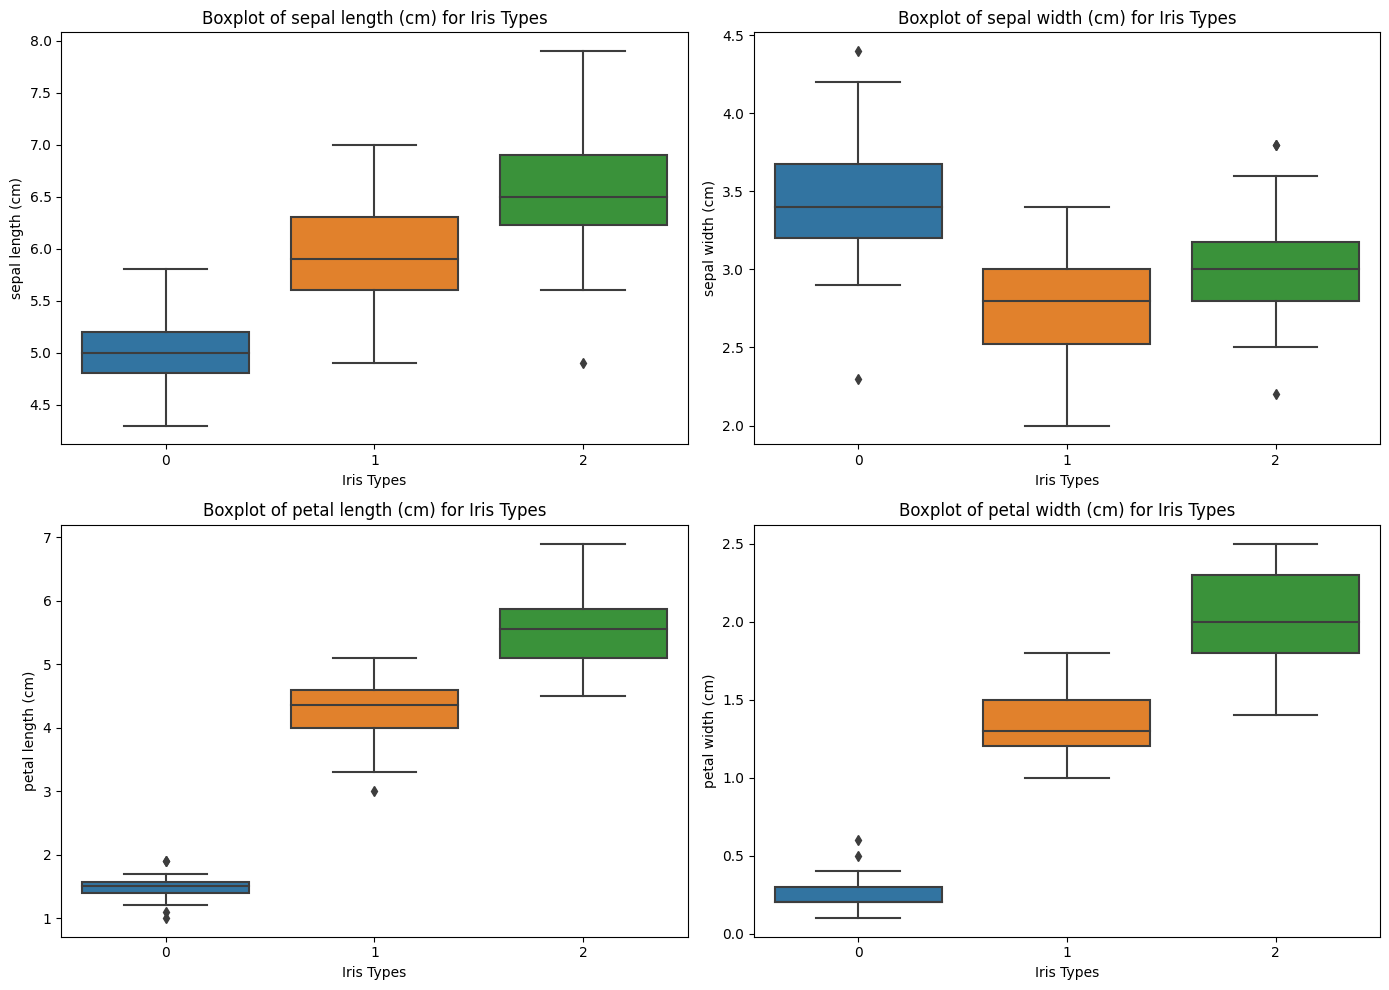

In [10]:
# Set the style of seaborn for better visualization
# sns.set(style="whitegrid")

# Create boxplots for each feature for the different iris types
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = 'type', y = feature, data = df)
    plt.title(f'Boxplot of {feature} for Iris Types')
    plt.xlabel('Iris Types')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Calculate correlation between SW, SL, PW and PL for each Species type.

In [11]:
# Pearson correlation
df.groupby(['type']).corr(method='pearson')

sepal length (cm)  sepal width (cm)  \
type                                                          
0    sepal length (cm)           1.000000          0.742547   
     sepal width (cm)            0.742547          1.000000   
     petal length (cm)           0.267176          0.177700   
     petal width (cm)            0.278098          0.232752   
1    sepal length (cm)           1.000000          0.525911   
     sepal width (cm)            0.525911          1.000000   
     petal length (cm)           0.754049          0.560522   
     petal width (cm)            0.546461          0.663999   
2    sepal length (cm)           1.000000          0.457228   
     sepal width (cm)            0.457228          1.000000   
     petal length (cm)           0.864225          0.401045   
     petal width (cm)            0.281108          0.537728   

                        petal length (cm)  petal width (cm)  
type                                                         
0    sepal length (cm)           0.267176          0.278098  
     sepal width (cm)            0.177700          0.232752  
     petal length (cm)           1.000000          0.331630  
     petal width (cm)            0.331630          1.000000  
1    sepal length (cm)           0.754049          0.546461  
     sepal width (cm)            0.560522          0.663999  
     petal length (cm)           1.000000          0.786668  
     petal width (cm)            0.786668          1.000000  
2    sepal length (cm)           0.864225          0.281108  
     sepal width (cm)            0.401045          0.537728  
     petal length (cm)           1.000000          0.322108  
     petal width (cm)            0.322108          1.000000

<Axes: >

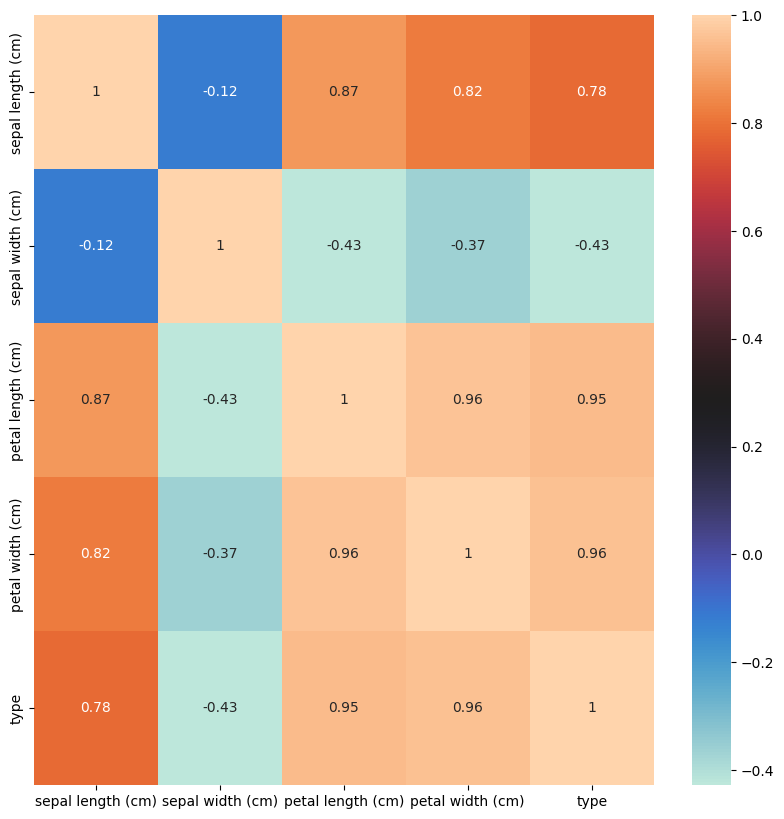

In [12]:
# Another way to show correlation
#Here, annot feature is to display correlation values in boxes and cmap is color map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'icefire')

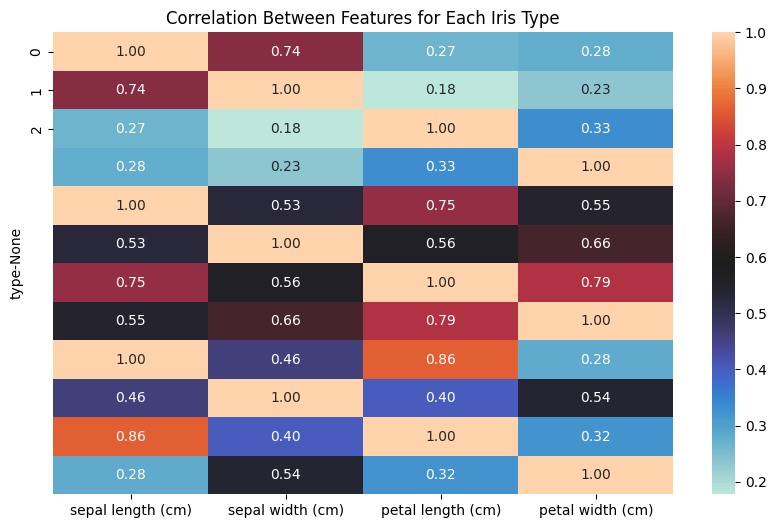

In [13]:
correlation_matrix = df.groupby('type').corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'icefire', fmt = '.2f',
            xticklabels = data.feature_names, yticklabels = df['type'].unique())
plt.title('Correlation Between Features for Each Iris Type')
plt.show()

Draw the following two scatterplots using the iris data: Plot SW vs SL and PW
vs PL. Use three different colors to denote the 3 species in each plot.


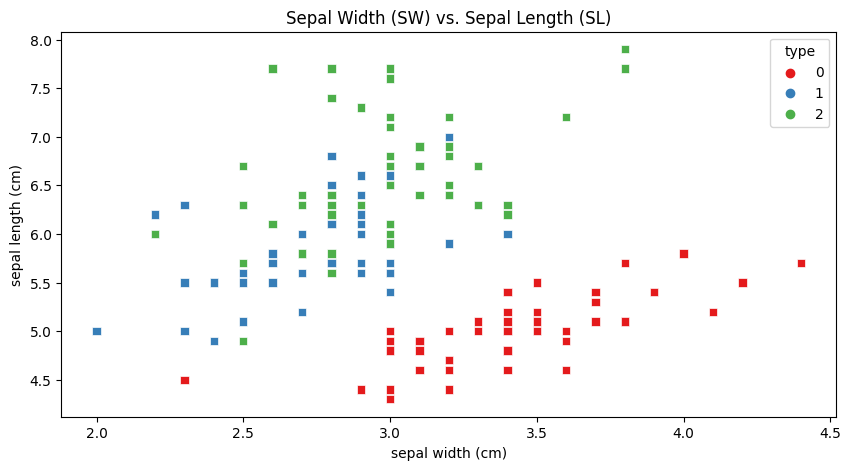

In [14]:
# Plot SW vs SL, SW is the x axis and SL is the y axis
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'sepal width (cm)', y = 'sepal length (cm)', data = df, marker = 's', hue= 'type', palette='Set1')
plt.title('Sepal Width (SW) vs. Sepal Length (SL)')
plt.show()

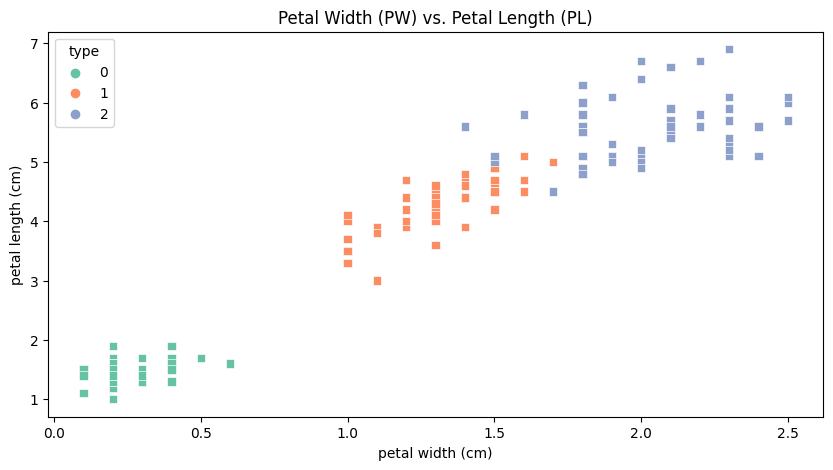

In [15]:
# Plot PW vs PL, PW is the x axis and PL is the y axis
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'petal width (cm)',y = 'petal length (cm)', data = df, marker = 's', hue= 'type', palette='Set2')
plt.title('Petal Width (PW) vs. Petal Length (PL)')
plt.show()

Get a random sample of size 60 (This should contains 20 random data points
from each species type). Write a simple function to caculate the mean and the
standard deviation of SW, SL, PW and PL from that sample for each species
type.

In [16]:
import random

result = {}

In [17]:
def function (data, feature):
    mean = data[feature].mean()
    std = data[feature].std()
    return mean, std

for type in df['type'].unique():
    type_data = df[df['type'] == type]
    random_indices = random.sample(range(len(type_data)), 20)
    random_sample = type_data.iloc[random_indices]

    means_std = {}
    for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
        mean, std = function(random_sample, feature)
        means_std[feature] = {'mean': mean, 'std': std}

    # Store the results for the current iris type
    result[type] = means_std

# Print the results
for type, values in result.items():
    print(f"Iris Type: {type}")
    for feature, stats in values.items():
        print(f"{feature} - Mean: {stats['mean']:.2f}, Std Dev: {stats['std']:.2f}")
    print()

Iris Type: 0
sepal length (cm) - Mean: 4.98, Std Dev: 0.38
sepal width (cm) - Mean: 3.37, Std Dev: 0.37
petal length (cm) - Mean: 1.51, Std Dev: 0.18
petal width (cm) - Mean: 0.23, Std Dev: 0.08

Iris Type: 1
sepal length (cm) - Mean: 5.90, Std Dev: 0.40
sepal width (cm) - Mean: 2.77, Std Dev: 0.34
petal length (cm) - Mean: 4.33, Std Dev: 0.43
petal width (cm) - Mean: 1.38, Std Dev: 0.20

Iris Type: 2
sepal length (cm) - Mean: 6.48, Std Dev: 0.65
sepal width (cm) - Mean: 2.95, Std Dev: 0.41
petal length (cm) - Mean: 5.43, Std Dev: 0.57
petal width (cm) - Mean: 1.95, Std Dev: 0.29



In [18]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Iris Type', 'Feature', 'Mean ± Std Dev']

for iris_type, values in result.items():
    for feature, mean_std_str in values.items():
        table.add_row([iris_type, feature, mean_std_str])

print(table)

+-----------+-------------------+----------------------------------------------------------+
| Iris Type |      Feature      |                      Mean ± Std Dev                      |
+-----------+-------------------+----------------------------------------------------------+
|     0     | sepal length (cm) | {'mean': 4.9799999999999995, 'std': 0.3778052965553331}  |
|     0     |  sepal width (cm) | {'mean': 3.374999999999999, 'std': 0.37257991018529724}  |
|     0     | petal length (cm) | {'mean': 1.5050000000000001, 'std': 0.1820208200931103}  |
|     0     |  petal width (cm) |       {'mean': 0.225, 'std': 0.07863975156570492}        |
|     1     | sepal length (cm) |  {'mean': 5.8950000000000005, 'std': 0.399308613006347}  |
|     1     |  sepal width (cm) |        {'mean': 2.77, 'std': 0.3357630743623592}         |
|     1     | petal length (cm) |        {'mean': 4.33, 'std': 0.4268612494895613}         |
|     1     |  petal width (cm) | {'mean': 1.3800000000000001, 'std': 